In [1]:
import datetime
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import pickle
import scipy
import scipy.odr
import seaborn as sns
import statsmodels.api as sm
import string
import time
import warnings

In [2]:
%matplotlib inline

In [3]:
import sys
sys.path.append("/home/kevin/softwares/")
import dashi
dashi.visual()

In [4]:
# loading data frame
df = pd.read_csv('train.csv')

In [5]:
# converting times to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [6]:
# Converting the times to seconds from the midnight
# and writing the day of the week (0-Mon to 6-Sun)

sLength = len(df)
c0 = np.zeros(sLength)
c1 = np.zeros(sLength)
c2 = np.zeros(sLength)

for i in range(len(df)):
    tmp = df['pickup_datetime'][i]
    tmp_d = df['pickup_datetime'][i]
    c0[i] = datetime.timedelta(hours=tmp.hour,
                               minutes=tmp.minute,
                               seconds=tmp.second).total_seconds()
    c1[i] = datetime.timedelta(hours=tmp_d.hour,
                               minutes=tmp_d.minute,
                               seconds=tmp_d.second).total_seconds()
    c2[i] = tmp.dayofweek

df['pickup_sec'] = pd.Series(c0, index=df.index)
df['dropoff_sec'] = pd.Series(c1, index=df.index)
df['day_of_week'] = pd.Series(c2, index=df.index)

In [6]:
# dumping and reading the info from above into pickle file
# comment out to avoind overwriting
#
# pickle.dump(df['pickup_sec'], open('pickup_sec.p', 'wb'))
# pickle.dump(df['dropoff_sec'], open('dropoff_sec.p', 'wb'))
# pickle.dump(df['day_of_week'], open('day_of_week.p', 'wb'))
df['pickup_sec'] = pickle.load(open('pickup_sec.p', 'rb'))
df['dropoff_sec'] = pickle.load(open('dropoff_sec.p', 'rb'))
df['day_of_week'] = pickle.load(open('day_of_week.p', 'rb'))

In [7]:
# printing the column values

print(df.columns.values)

['id' 'vendor_id' 'pickup_datetime' 'dropoff_datetime' 'passenger_count'
 'pickup_longitude' 'pickup_latitude' 'dropoff_longitude'
 'dropoff_latitude' 'store_and_fwd_flag' 'trip_duration' 'pickup_sec'
 'dropoff_sec' 'day_of_week']


In [8]:
# printing data frame

df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_sec,dropoff_sec,day_of_week
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,62695.0,62695.0,0.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2615.0,2615.0,6.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,41724.0,41724.0,1.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,70351.0,70351.0,2.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,48655.0,48655.0,5.0
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,79300.0,79300.0,5.0
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341,81299.0,81299.0,4.0
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,28498.0,28498.0,5.0
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255,83543.0,83543.0,4.0
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,78301.0,78301.0,3.0


#### Machine Learning

In [13]:
# loading sklearn modules
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.cross_validation import train_test_split
from sklearn.externals import joblib
import glob

In [12]:
# creating the X and y values
X = np.column_stack((df['pickup_latitude'].values,
                     df['pickup_longitude'].values))
X = np.column_stack((X, df['dropoff_latitude'].values))
X = np.column_stack((X, df['dropoff_longitude'].values))
X = np.column_stack((X, df['pickup_sec'].values))
X = np.column_stack((X, df['day_of_week'].values))

y = df['trip_duration'].values

In [38]:
# Splitind data into train/test datasets
# 80/20% train/test sample

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=42)

In [419]:
# fitting with a Linear 'y'
rng = np.random.RandomState(1)

regr = AdaBoostRegressor(DecisionTreeRegressor(),
                            n_estimators=50, random_state=rng)

regr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=<mtrand.RandomState object at 0x81c43960>)

In [420]:
# fitting with a Logarithmic 'y'
rng = np.random.RandomState(1)

regrLog = AdaBoostRegressor(DecisionTreeRegressor(),
                            n_estimators=50, random_state=rng)

regrLog.fit(X_train, np.log10(y_train))

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=<mtrand.RandomState object at 0x820477d0>)

In [423]:
# dumping info into file
# comment out to avoid overwriting
#
joblib.dump(regr, 'regr/regr_50.pkl')

['regr/regr_50.pkl',
 'regr/regr_50.pkl_01.npy',
 'regr/regr_50.pkl_02.npy',
 'regr/regr_50.pkl_03.npy',
 'regr/regr_50.pkl_04.npy',
 'regr/regr_50.pkl_05.npy',
 'regr/regr_50.pkl_06.npy',
 'regr/regr_50.pkl_07.npy',
 'regr/regr_50.pkl_08.npy',
 'regr/regr_50.pkl_09.npy',
 'regr/regr_50.pkl_10.npy',
 'regr/regr_50.pkl_11.npy',
 'regr/regr_50.pkl_12.npy',
 'regr/regr_50.pkl_13.npy',
 'regr/regr_50.pkl_14.npy',
 'regr/regr_50.pkl_15.npy',
 'regr/regr_50.pkl_16.npy',
 'regr/regr_50.pkl_17.npy',
 'regr/regr_50.pkl_18.npy',
 'regr/regr_50.pkl_19.npy',
 'regr/regr_50.pkl_20.npy',
 'regr/regr_50.pkl_21.npy',
 'regr/regr_50.pkl_22.npy',
 'regr/regr_50.pkl_23.npy',
 'regr/regr_50.pkl_24.npy',
 'regr/regr_50.pkl_25.npy',
 'regr/regr_50.pkl_26.npy',
 'regr/regr_50.pkl_27.npy',
 'regr/regr_50.pkl_28.npy',
 'regr/regr_50.pkl_29.npy',
 'regr/regr_50.pkl_30.npy',
 'regr/regr_50.pkl_31.npy',
 'regr/regr_50.pkl_32.npy',
 'regr/regr_50.pkl_33.npy',
 'regr/regr_50.pkl_34.npy',
 'regr/regr_50.pkl_35.npy',

In [424]:
# dumping info into file
# comment out to avoid overwriting
#
joblib.dump(regrLog, 'regr/regr_50_log.pkl')

['regr/regr_50_log.pkl',
 'regr/regr_50_log.pkl_01.npy',
 'regr/regr_50_log.pkl_02.npy',
 'regr/regr_50_log.pkl_03.npy',
 'regr/regr_50_log.pkl_04.npy',
 'regr/regr_50_log.pkl_05.npy',
 'regr/regr_50_log.pkl_06.npy',
 'regr/regr_50_log.pkl_07.npy',
 'regr/regr_50_log.pkl_08.npy',
 'regr/regr_50_log.pkl_09.npy',
 'regr/regr_50_log.pkl_10.npy',
 'regr/regr_50_log.pkl_11.npy',
 'regr/regr_50_log.pkl_12.npy',
 'regr/regr_50_log.pkl_13.npy',
 'regr/regr_50_log.pkl_14.npy',
 'regr/regr_50_log.pkl_15.npy',
 'regr/regr_50_log.pkl_16.npy',
 'regr/regr_50_log.pkl_17.npy',
 'regr/regr_50_log.pkl_18.npy',
 'regr/regr_50_log.pkl_19.npy',
 'regr/regr_50_log.pkl_20.npy',
 'regr/regr_50_log.pkl_21.npy',
 'regr/regr_50_log.pkl_22.npy',
 'regr/regr_50_log.pkl_23.npy',
 'regr/regr_50_log.pkl_24.npy',
 'regr/regr_50_log.pkl_25.npy',
 'regr/regr_50_log.pkl_26.npy',
 'regr/regr_50_log.pkl_27.npy',
 'regr/regr_50_log.pkl_28.npy',
 'regr/regr_50_log.pkl_29.npy',
 'regr/regr_50_log.pkl_30.npy',
 'regr/regr_50_

#### Correlation Function

In [463]:
# Stage correlation coefficient for 'regrLog'
n_estimators = 50

ada_log_r2_train = np.zeros((n_estimators,))
for i_, y_pred_ in enumerate(regrLog.staged_predict(X_train)):
    ada_log_r2_train[i_] = np.corrcoef(np.power(10, y_pred_), y_train)[0,1]

ada_log_r2_test = np.zeros((n_estimators,))
for i_, y_pred_ in enumerate(regrLog.staged_predict(X_test)):
    ada_log_r2_test[i_] = np.corrcoef(np.power(10, y_pred_), y_test)[0,1]

In [430]:
# Stage correlation coefficient for 'regr'
n_estimators = 50

ada_r2_train = np.zeros((n_estimators,))
for i_, y_pred_ in enumerate(regr.staged_predict(X_train)):
    ada_r2_train[i_] = np.corrcoef(y_pred_, y_train)[0,1]

ada_r2_test = np.zeros((n_estimators,))
for i_, y_pred_ in enumerate(regr.staged_predict(X_test)):
    ada_r2_test[i_] = np.corrcoef(y_pred_, y_test)[0,1]

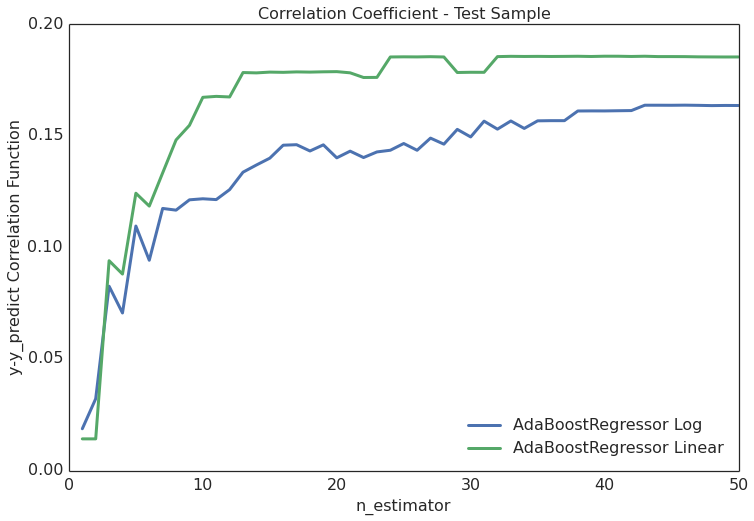

In [473]:
# plotting the correlation coefficient

fig = plt.figure(figsize=[12, 8])
ax = fig.add_subplot(111)

ax.plot(np.arange(n_estimators) + 1, ada_log_r2_test,
        label='AdaBoostRegressor Log',
        lw=3)
ax.plot(np.arange(n_estimators) + 1, ada_r2_test,
        label='AdaBoostRegressor Linear',
        lw=3)

plt.legend(loc=0, fontsize=16)
plt.xlabel('n_estimator', fontsize=16)
plt.ylabel('y-y_predict Correlation Function', fontsize=16)
plt.tick_params(axis='both',which='major',labelsize=16)
plt.title('Correlation Coefficient - Test Sample', fontsize=16)

The linear adaboost here has a better output but the y-y_predic is also linear when the correlation coefficient is calculated, which is not a good practice. See 'Heteroscedasticity'.

In [475]:
# calculating the correlation function of log(y) and log(y_predict)

ada_log_r2_test_ln = np.zeros((n_estimators,))
for i_, y_pred_ in enumerate(regrLog.staged_predict(X_test)):
    ada_log_r2_test_ln[i_] = np.corrcoef(y_pred_, np.log10(y_test))[0,1]

ada_r2_test_ln = np.zeros((n_estimators,))
for i_, y_pred_ in enumerate(regr.staged_predict(X_test)):
    ada_r2_test_ln[i_] = np.corrcoef(np.log10(y_pred_), np.log10(y_test))[0,1]

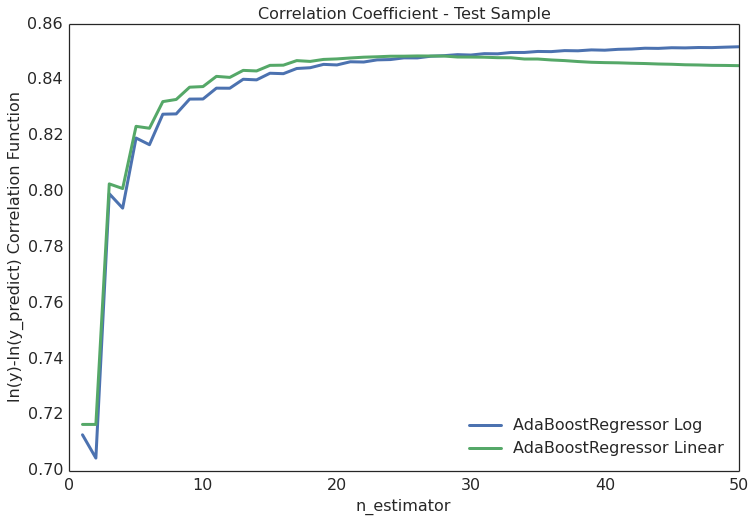

In [477]:
# plotting the correlation coefficient

fig = plt.figure(figsize=[12, 8])
ax = fig.add_subplot(111)

ax.plot(np.arange(n_estimators) + 1, ada_log_r2_test_ln,
        label='AdaBoostRegressor Log',
        lw=3)
ax.plot(np.arange(n_estimators) + 1, ada_r2_test_ln,
        label='AdaBoostRegressor Linear',
        lw=3)

plt.legend(loc=0, fontsize=16)
plt.xlabel('n_estimator', fontsize=16)
plt.ylabel('ln(y)-ln(y_predict) Correlation Function', fontsize=16)
plt.tick_params(axis='both',which='major',labelsize=16)
plt.title('Correlation Coefficient - Test Sample', fontsize=16)

The result is very close however the logarithmic AdaBoost has a slightly better output.

However correlation coefficient is not the best variable to measure the goodness of fit. Perhaps time duration (y) resulation can be obtain via formula bellow:

$\int_{y_{predict}} P(y|y_{predict})P(y_{predict}|\hat{y})dy_{predict}$

which shows the resulation as a fuction of time duration (y).

(This test has not been done here)

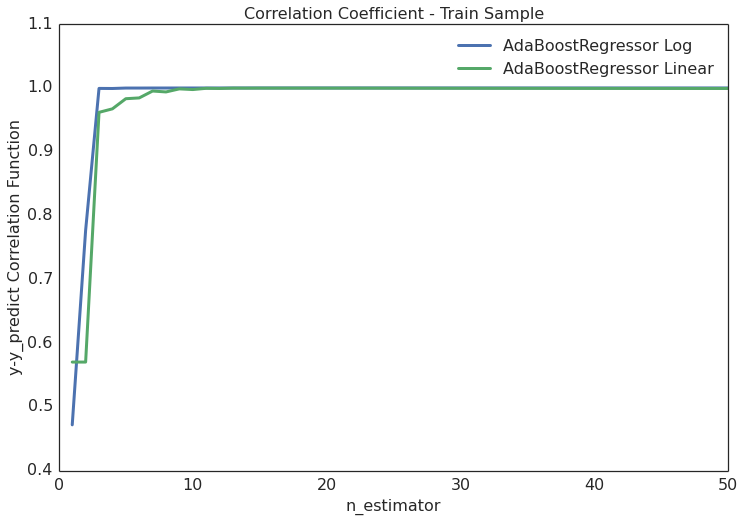

In [472]:
# plotting the correlation coefficient

fig = plt.figure(figsize=[12, 8])
ax = fig.add_subplot(111)

ax.plot(np.arange(n_estimators) + 1, ada_log_r2_train,
        label='AdaBoostRegressor Log',
        lw=3)
ax.plot(np.arange(n_estimators) + 1, ada_r2_train,
        label='AdaBoostRegressor Linear',
        lw=3)

plt.legend(loc=0, fontsize=16)
plt.xlabel('n_estimator', fontsize=16)
plt.ylabel('y-y_predict Correlation Function', fontsize=16)
plt.tick_params(axis='both',which='major',labelsize=16)
plt.ylim(0.4, 1.1)
plt.title('Correlation Coefficient - Train Sample', fontsize=16)

#### Score

In [460]:
# Stage correlation functions for test samples
n_estimators = 50

ada_score_test = np.zeros((n_estimators,))
for i_, score_ in enumerate(regr.staged_score(X_test, y_test)):
    ada_score_test[i_] = score_

ada_log_score_test = np.zeros((n_estimators,))
for i_, score_ in enumerate(regrLog.staged_score(X_test, np.log10(y_test))):
    ada_log_score_test[i_] = score_

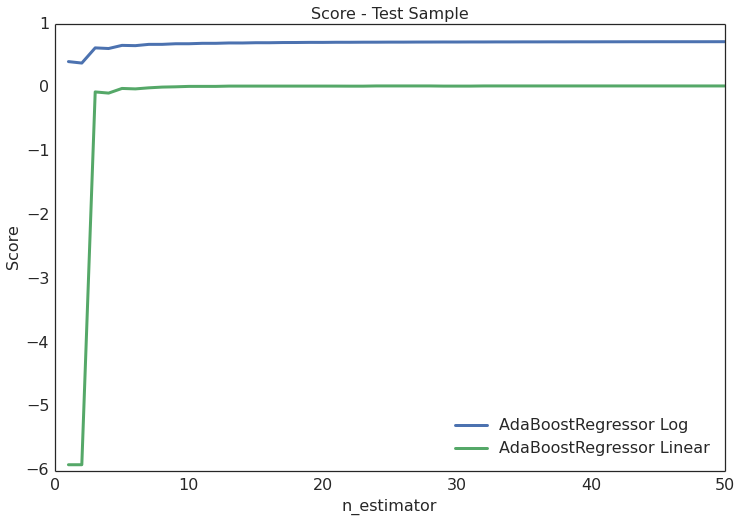

In [523]:
# plotting the scores for test samples

fig = plt.figure(figsize=[12, 8])
ax = fig.add_subplot(111)

ax.plot(np.arange(n_estimators) + 1, ada_log_score_test,
        label='AdaBoostRegressor Log',
        lw=3)
ax.plot(np.arange(n_estimators) + 1, ada_score_test,
        label='AdaBoostRegressor Linear',
        lw=3)

plt.legend(loc=0, fontsize=16)
plt.xlabel('n_estimator', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.tick_params(axis='both',which='major',labelsize=16)
plt.title('Score - Test Sample', fontsize=16)

In [458]:
# Stage correlation functions for train samples
n_estimators = 50

ada_score_train = np.zeros((n_estimators,))
for i_, score_ in enumerate(regr.staged_score(X_train, y_train)):
    ada_score_train[i_] = score_

ada_log_score_train = np.zeros((n_estimators,))
for i_, score_ in enumerate(regrLog.staged_score(X_train, np.log10(y_train))):
    ada_log_score_train[i_] = score_

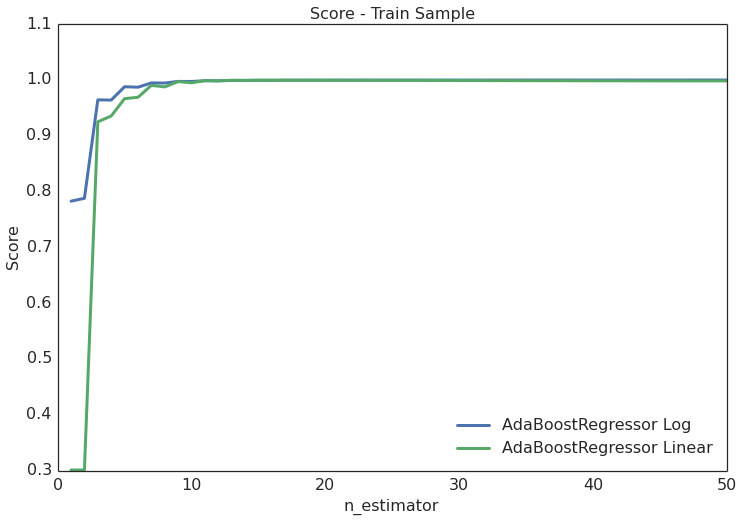

In [470]:
# plotting the scores for train samples

fig = plt.figure(figsize=[12, 8])
ax = fig.add_subplot(111)

ax.plot(np.arange(n_estimators) + 1, ada_log_score_train,
        label='AdaBoostRegressor Log',
        lw=3)
ax.plot(np.arange(n_estimators) + 1, ada_score_train,
        label='AdaBoostRegressor Linear',
        lw=3)

plt.legend(loc=0, fontsize=16)
plt.xlabel('n_estimator', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.tick_params(axis='both',which='major',labelsize=16)
plt.ylim(0.3, 1.1)
plt.title('Score - Train Sample', fontsize=16)

#### plots

Calculating the predicted 'y':

In [445]:
y_test_predLog = regrLog.predict(X_test)

In [446]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

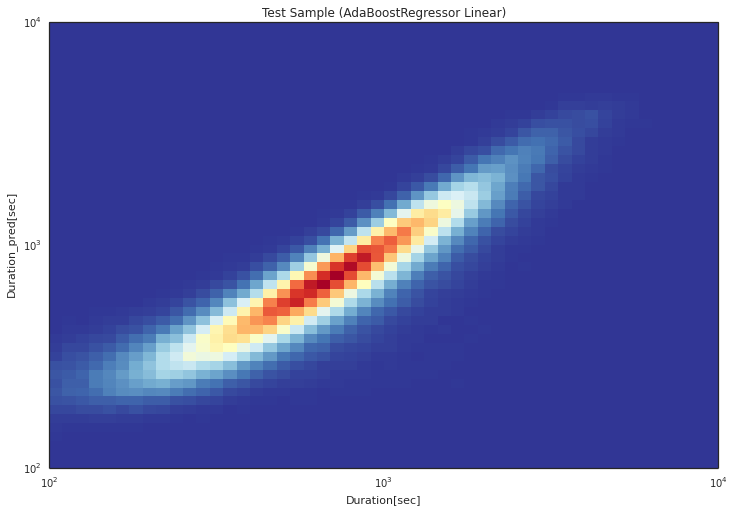

In [478]:
# Plotting the AdaBoostRegressor Linear

fig, ax = plt.subplots(figsize = [12, 8])

bins = np.logspace(2, 4, 51)
xbins = bins
ybins = bins

hist = dashi.factory.hist2d((y_test, y_test_pred),
                             bins=(xbins, ybins))


hist.imshow(norm=mpl.colors.Normalize(), cmap = mpl.cm.RdYlBu_r)
plt.loglog()
plt.xlabel('Duration[sec]')
plt.ylabel('Duration_pred[sec]')
plt.title('Test Sample - AdaBoostRegressor Linear')

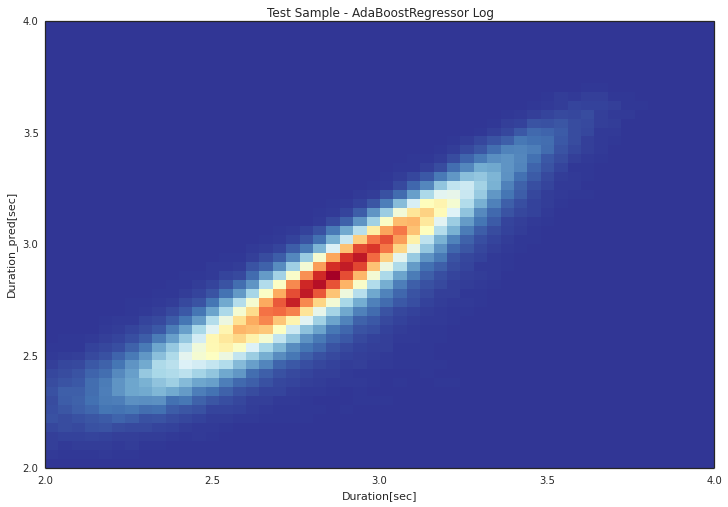

In [479]:
# Plotting the AdaBoostRegressor Logarithmic

fig, ax = plt.subplots(figsize = [12, 8])

bins = np.linspace(2, 4, 51)
xbins = bins
ybins = bins

hist = dashi.factory.hist2d((np.log10(y_test), y_test_predLog),
                             bins=(xbins, ybins))


hist.imshow(norm=mpl.colors.Normalize(), cmap = mpl.cm.RdYlBu_r)
plt.xlabel('Duration[sec]')
plt.ylabel('Duration_pred[sec]')
plt.title('Test Sample - AdaBoostRegressor Log')

The 'AdaBoostRegressor Logarithmic' prediction plot is slightly more straight on y=x line than the linear prediction. (see 'Heteroscedasticity')

#### Overfitting

N/A

#### Multi-collinearity test

Plotting the correlation matrix of the AdaBoostRegressor's input variables:

In [69]:
d = pd.DataFrame(data=X,
                 columns=list(['pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
                               'dropoff_longitude', 'pickup_sec', 'day_of_week']))

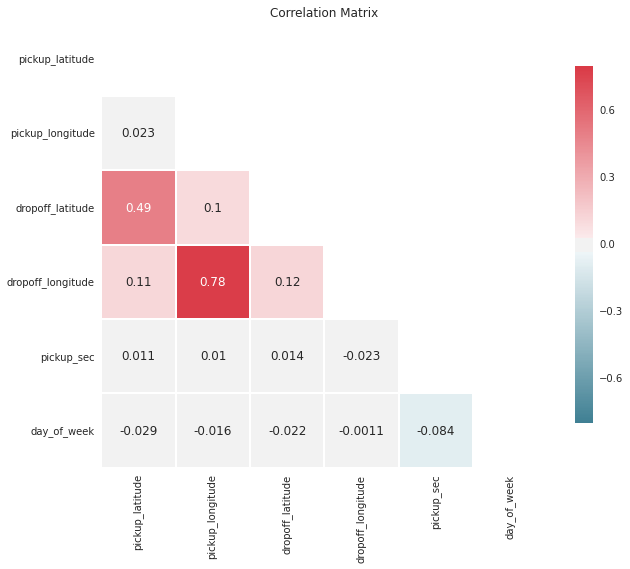

In [73]:
sns.set(style="white")

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8,
            square=True, annot=True,
            linewidths=.5, cbar_kws={"shrink": .8}, ax=ax)

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Matrix')

Correlation of latitute and longtitude at pick-up and drop-off locations are due to the closeness of the locations geographically.

#### Heteroscedasticity test

Here we need to see whether or not the dispersion of the 2-D histogram of true-y and other varible are constant or not. If not, there might be variables that we have missed which potentially can desribe the model better.

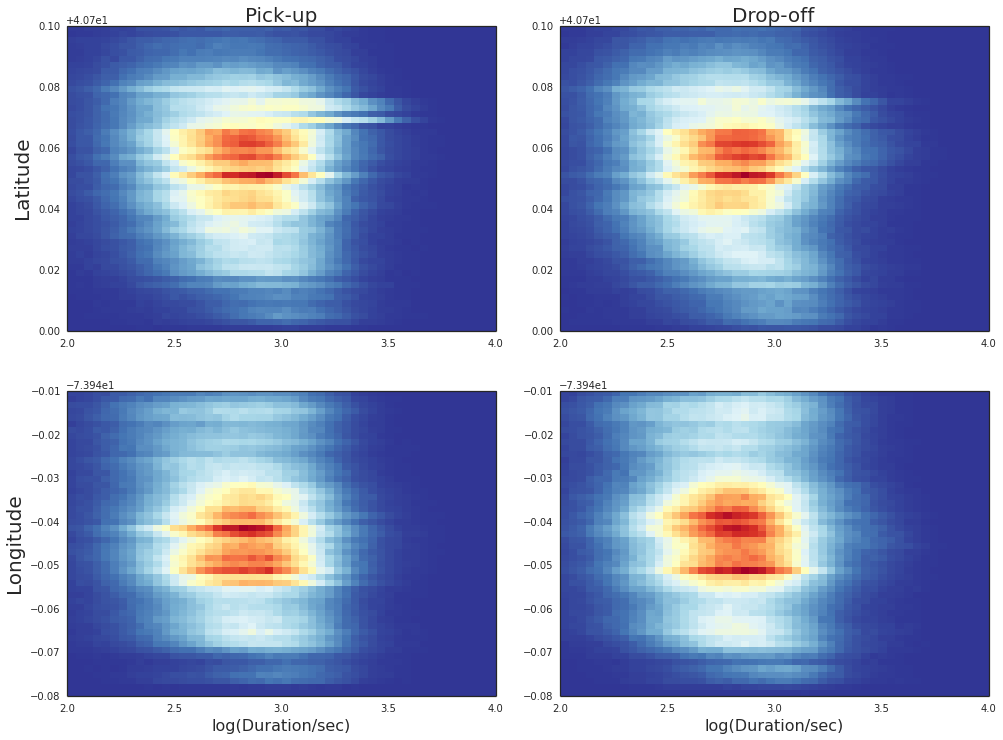

In [215]:
# 2-D histogram of true-duration vs. Latitude and Longitude of
# the pick-up and drop-off locations

minLat = 40.7
maxLat = 40.8
minLong = -74.02
maxLong = -73.95

fig = plt.figure(figsize=[16,12])
fig.subplots_adjust(left=0.1, wspace=0.15)


xbins = np.linspace(2, 4, 51)

i=0
ybins = np.linspace(minLat, maxLat, 51)
ax1 = fig.add_subplot(221)
ax1.hist2d(np.log10(y), X[:,i],
           bins=(xbins, ybins),
           cmap = mpl.cm.RdYlBu_r,
           norm=mpl.colors.Normalize())

i=2
ybins = np.linspace(minLat, maxLat, 51)
ax2 = fig.add_subplot(222)
ax2.hist2d(np.log10(y), X[:,i],
           bins=(xbins, ybins),
           cmap = mpl.cm.RdYlBu_r,
           norm=mpl.colors.Normalize())

i=1
ybins = np.linspace(minLong, maxLong, 51)
ax3 = fig.add_subplot(223)
ax3.hist2d(np.log10(y), X[:,i],
           bins=(xbins, ybins),
           cmap = mpl.cm.RdYlBu_r,
           norm=mpl.colors.Normalize())

i=3
ybins = np.linspace(minLong, maxLong, 51)
ax4 = fig.add_subplot(224)
ax4.hist2d(np.log10(y), X[:,i],
           bins=(xbins, ybins),
           cmap = mpl.cm.RdYlBu_r,
           norm=mpl.colors.Normalize())

ax1.set_title('Pick-up', fontsize=20)
ax2.set_title('Drop-off', fontsize=20)

ax1.set_ylabel('Latitude', fontsize=20)
ax3.set_ylabel('Longitude', fontsize=20)

ax3.set_xlabel('log(Duration/sec)', fontsize=16)
ax4.set_xlabel('log(Duration/sec)', fontsize=16)

[]

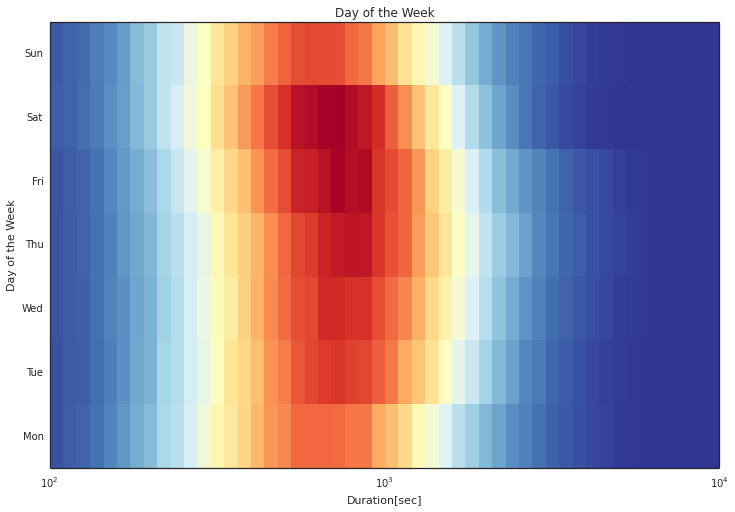

In [149]:
# 2-D histogram of true-duration vs. day of the week

fig, ax = plt.subplots(figsize = [12, 8])
i=5
bins = np.logspace(2, 4, 51)
xbins = bins
ybins = np.linspace(min(X[:,i]), max(X[:,i]), 51)
ybins = np.linspace(0,7, 8)

hist = dashi.factory.hist2d((y, X[:,i]),
                             bins=(xbins, ybins))


hist.imshow(norm=mpl.colors.Normalize(), cmap = mpl.cm.RdYlBu_r)
plt.yticks(np.arange(0, 7) + 0.5, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Duration[sec]')
plt.ylabel('Day of the Week')
plt.title('Day of the Week')
plt.semilogx()

[]

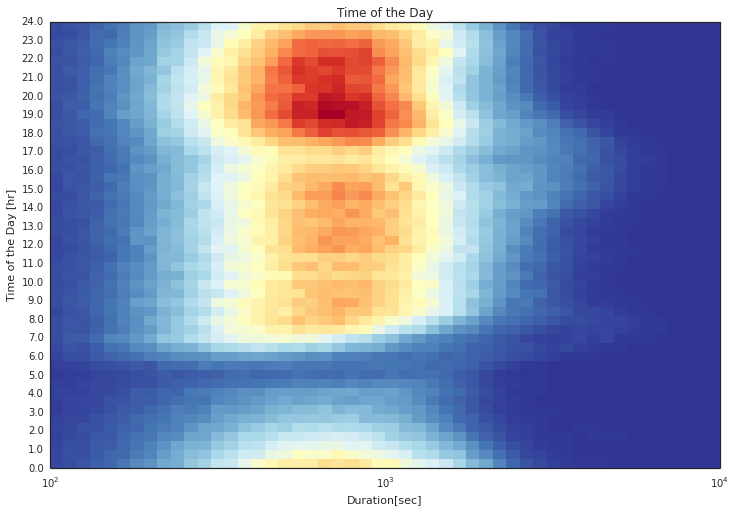

In [147]:
# 2-D histogram of true-duration vs. time of the day

fig, ax = plt.subplots(figsize = [12, 8])
i=4
bins = np.logspace(2, 4, 51)
xbins = bins
ybins = np.linspace(min(X[:,i]), max(X[:,i]), 51)

hist = dashi.factory.hist2d((y, X[:,i]),
                             bins=(xbins, ybins))

hist.imshow(norm=mpl.colors.Normalize(), cmap = mpl.cm.RdYlBu_r)
plt.yticks(np.linspace(0, 24, 25) * 3600, np.linspace(0, 24, 25))

plt.xlabel('Duration[sec]')
plt.ylabel('Time of the Day [hr]')
plt.title('Time of the Day')
plt.semilogx()

[]

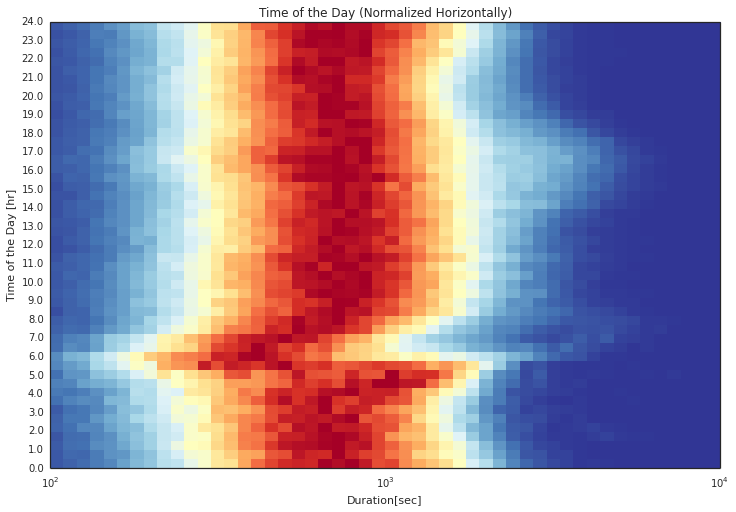

In [148]:
# 2-D histogram of true-duration vs. time of the day
# Normalized Horizontally

fig, ax = plt.subplots(figsize = [12, 8])
i=4
bins = np.logspace(2, 4, 51)
xbins = bins
ybins = np.linspace(min(X[:,i]), max(X[:,i]), 51)

hist = dashi.factory.hist2d((y, X[:,i]),
                             bins=(xbins, ybins))

# Normalize horizontally
for i in range(len(hist.bincontent[0])):
    den = max(hist.bincontent[:,i])
    for j in range(len(hist.bincontent[:,i])):
        hist.bincontent[j][i] /= (den * 1.)

hist.imshow(norm=mpl.colors.Normalize(), cmap = mpl.cm.RdYlBu_r)
plt.yticks(np.linspace(0, 24, 25) * 3600, np.linspace(0, 24, 25))

plt.xlabel('Duration[sec]')
plt.ylabel('Time of the Day [hr]')
plt.title('Time of the Day (Normalized Horizontally)')
plt.semilogx()

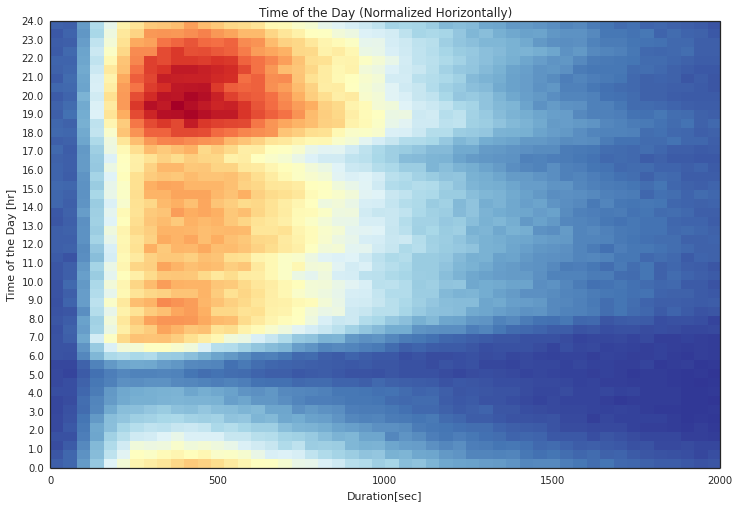

In [530]:
# 2-D histogram of true-duration vs. time of the day
# Linear x-axis (true duration)

fig, ax = plt.subplots(figsize = [12, 8])
i=4
bins = np.linspace(0, 2e3, 51)
xbins = bins
ybins = np.linspace(min(X[:,i]), max(X[:,i]), 51)

hist = dashi.factory.hist2d((y, X[:,i]),
                             bins=(xbins, ybins))

hist.imshow(norm=mpl.colors.Normalize(), cmap = mpl.cm.RdYlBu_r)
plt.yticks(np.linspace(0, 24, 25) * 3600, np.linspace(0, 24, 25))

plt.xlabel('Duration[sec]')
plt.ylabel('Time of the Day [hr]')
plt.title('Time of the Day (Normalized Horizontally)')

#### Calculating the error (Linear)

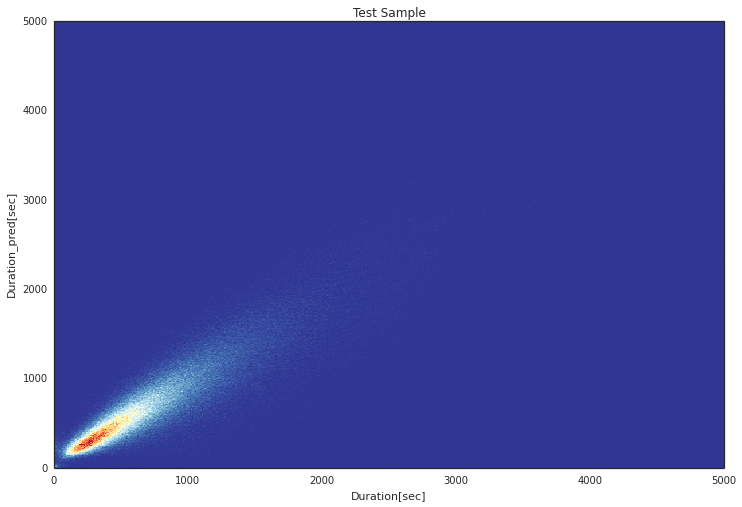

In [340]:
fig, ax = plt.subplots(figsize = [12, 8])

bins = np.linspace(1, 5000, 501)
xbins = bins
ybins = bins

hist = dashi.factory.hist2d((y_test, np.power(10, y_test_predLog)),
                             bins=(xbins, ybins))


hist.imshow(norm=mpl.colors.Normalize(), cmap = mpl.cm.RdYlBu_r)
plt.xlabel('Duration[sec]')
plt.ylabel('Duration_pred[sec]')
plt.title('Test Sample')

In [341]:
std = []
for i in range(len(hist.bincontent)):
    N_ = sum(hist.bincontent[i])
    x_bar_ = sum((hist.bincenters[0] * hist.bincontent[i])) * 1. / N_
    sigma2_ = sum((hist.bincontent[i] * (hist.bincenters[0] - x_bar_) * (hist.bincenters[0] - x_bar_))) * 1. / N_
    sigma_ = np.sqrt(sigma2_)
    std.append(sigma_)

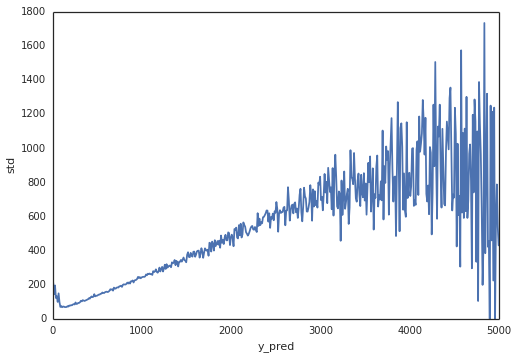

In [387]:
plt.plot(hist.bincenters[0], std)
plt.xlabel('y_pred')
plt.ylabel('std')

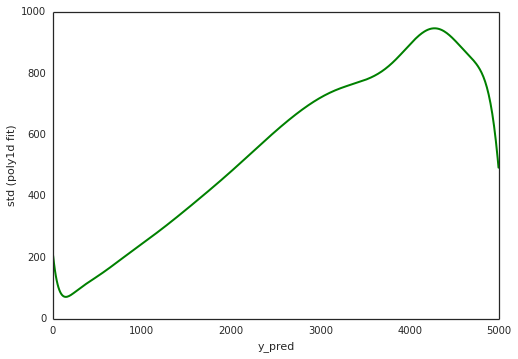

In [388]:
p16 = np.poly1d(np.polyfit(hist.bincenters[0], std, 16))
plt.plot(hist.bincenters[0], p16(hist.bincenters[0]), 'g', lw=2)
plt.xlabel('y_pred')
plt.ylabel('std (poly1d fit)')

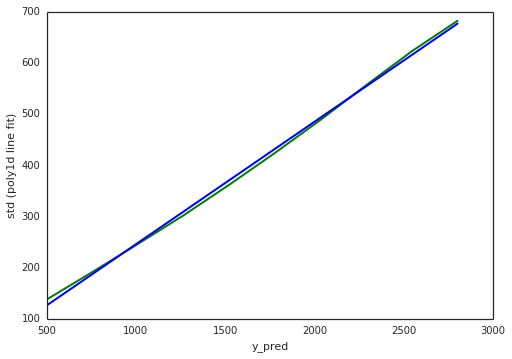

In [389]:
x = np.linspace(500,2800, 10)
p1 = np.poly1d(np.polyfit(x, p16(x), 1))
plt.plot(x, p16(x), 'g', lw=2)
plt.plot(x, p1(x), 'b', lw=2)
plt.xlabel('y_pred')
plt.ylabel('std (poly1d line fit)')

In [368]:
# Dumping p16 and p1
# pickle.dump(p16, open('p16.p', 'wb'))
# pickle.dump(p1, open('p1.p', 'wb'))
p16 = pickle.load(open('p16.p', 'rb'))
p1 = pickle.load(open('p1.p', 'rb'))

In [384]:
def get_error(x):
    return np.where(x < 2800, p16(x), p1(x))

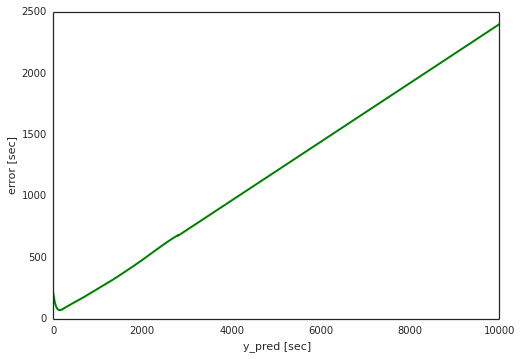

In [391]:
x = np.linspace(0,10000, 1000)
plt.plot(x, get_error(x), 'g', lw=2)
plt.xlabel('y_pred [sec]')
plt.ylabel('error [sec]')

#### Calculating the error (Log)

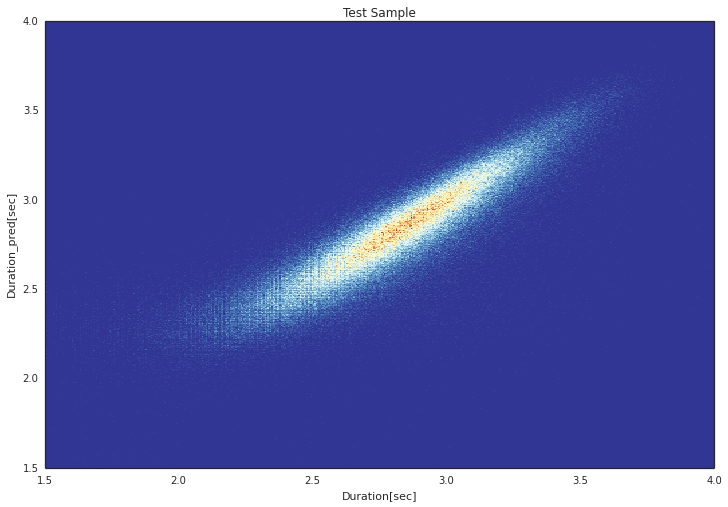

In [482]:
fig, ax = plt.subplots(figsize = [12, 8])

bins = np.linspace(1.5, 4, 501)
xbins = bins
ybins = bins

hist = dashi.factory.hist2d((np.log10(y_test), y_test_predLog),
                             bins=(xbins, ybins))


hist.imshow(norm=mpl.colors.Normalize(), cmap = mpl.cm.RdYlBu_r)
plt.xlabel('Duration[sec]')
plt.ylabel('Duration_pred[sec]')
plt.title('Test Sample')

In [483]:
std = []
for i in range(len(hist.bincontent)):
    N_ = sum(hist.bincontent[i])
    x_bar_ = sum((hist.bincenters[0] * hist.bincontent[i])) * 1. / N_
    sigma2_ = sum((hist.bincontent[i] * (hist.bincenters[0] - x_bar_) * (hist.bincenters[0] - x_bar_))) * 1. / N_
    sigma_ = np.sqrt(sigma2_)
    std.append(sigma_)

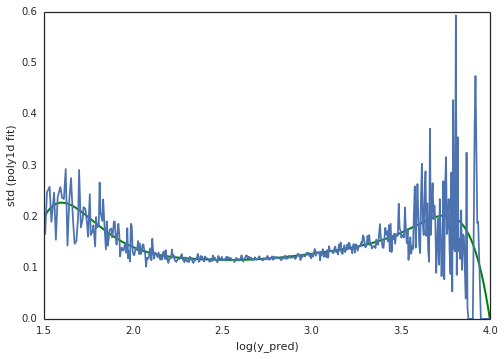

In [510]:
filter = (np.isnan(std) == False)
p8Log = np.poly1d(np.polyfit(hist.bincenters[0][filter], np.array(std)[filter], 8))
plt.plot(hist.bincenters[0], p8Log(hist.bincenters[0]), 'g', lw=2)
plt.plot(hist.bincenters[0][filter], np.array(std)[filter])
plt.xlabel('log(y_pred)')
plt.ylabel('std (poly1d fit)')

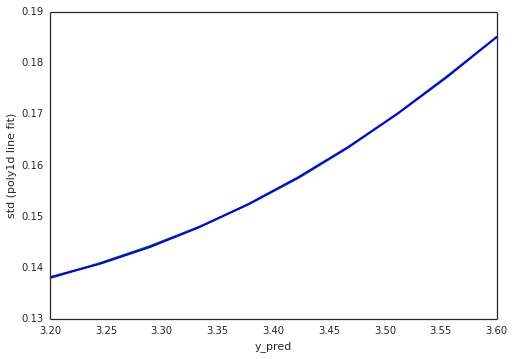

In [513]:
x = np.linspace(3.2,3.6, 10)
p2Log = np.poly1d(np.polyfit(x, p8Log(x), 2))
plt.plot(x, p8Log(x), 'g', lw=2)
plt.plot(x, p2Log(x), 'b', lw=2)
plt.xlabel('y_pred')
plt.ylabel('std (poly1d line fit)')

In [514]:
# Dumping p8Log and p2Log
# pickle.dump(p8Log, open('p8Log.p', 'wb'))
# pickle.dump(p2Log, open('p2Log.p', 'wb'))
p8Log = pickle.load(open('p8Log.p', 'rb'))
p2Log = pickle.load(open('p2Log.p', 'rb'))

In [533]:
def get_error_log(x):
    return np.where(x < 3.6, p8Log(x), p2Log(x))

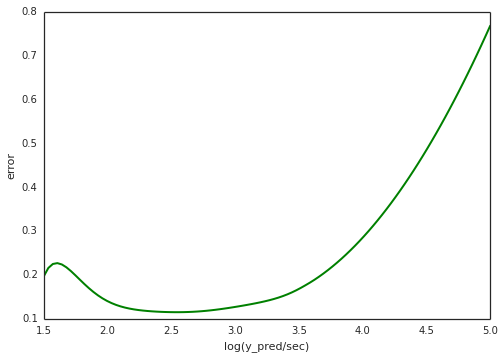

In [520]:
x = np.linspace(1.5,5, 100)
plt.plot(x, get_error_log(x), 'g', lw=2)
plt.xlabel('log(y_pred/sec)')
plt.ylabel('error')